# Chapter 6: Discuusion
# JME inversion with adjusted starting model


<div class="alert alert-success">
    
This Notebook contains the Code to produce results with the adusted starting model after 6.1
    

In [1]:
# Importing pygimli
import  pygimli                 as     pg
import  pygimli.meshtools       as     mt
from    pygimli.physics         import ert
from    pygimli.physics         import TravelTimeManager
from    pygimli.viewer.mpl      import createColorBarOnly
from    JointEntropyClass       import JointEntropyInversion as JEI
from    PlotFunctions_Ch4       import *
# Importing auxiliary libraries
import  numpy                   as     np
import  matplotlib.pyplot       as     plt
import  sys


# Setting options
seed_val = 420
np.random.seed(seed_val)

# Filenames
fn_ert_dd  = 'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Data/Synthetic/Synth_ert_dd.dat'
fn_tt      = 'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Data/Synthetic/Synth_tt.dat'

# Plotting
c_ert = 'gnuplot'
c_srt = 'viridis'
lim_ert = [5e1, 1e4]
ert_marks = [7e1, 7e3, 7e2]
ert_label = ['Square', 'Circle', 'Half-space']

lim_srt = [300, 4200]
srt_marks = [3e3, 2e3, 5e2, 4e3]
srt_label = ['Square', 'Circle', 'Layer 1', 'Layer 2']

## Geometry for Comparison

In [2]:
# Create layered subsurface
world = mt.createWorld([-35,-20], [35, 0], layers=[-13],marker=1)
# Create surface points for Diatreme
cube = mt.createRectangle(pos=[-8, -8], size=[9.0, 9.0],marker=3)
circ = mt.createCircle(pos=(8, -8), radius=4.5, nSegments=30,marker=4)
# Combine Diatreme and layered subsurface
geom = world + circ + cube

## Data and Inversion Mesh

In [3]:
# Loading ERT
ert_data = ert.load(fn_ert_dd)
ERT = ert.ERTManager(ert_data)

# Loading SRT
tt_data = pg.physics.traveltime.load(fn_tt)
SRT = TravelTimeManager(tt_data)

# inversion mesh
w = mt.createWorld([-65,-20], [65, 0])
for x in np.arange(-64,65,1):
    w.createNode([x,0])
invmesh = mt.createMesh(w,area=1.5)
extmesh = mt.appendTriangleBoundary(invmesh,xbound=100,ybound=100,marker=0)


In [4]:
q=1
beta = 1e-10

lam_ert = 3e-3
a_ert = 15

lam_srt = 1e-2
a_srt = 90

## JME - old

01/08/23 - 15:14:49 - pyGIMLi - INFO - Found 2 regions.
01/08/23 - 15:14:49 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
01/08/23 - 15:14:49 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/08/23 - 15:14:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


Starting Iteration 0...
... ERT


01/08/23 - 15:14:49 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
01/08/23 - 15:14:50 - pyGIMLi - INFO - Use median(data values)=619.288890298902
01/08/23 - 15:14:50 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
01/08/23 - 15:14:50 - pyGIMLi - INFO - Setting starting model as reference!
01/08/23 - 15:15:21 - pyGIMLi - INFO - Found 1 regions.
01/08/23 - 15:15:21 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/08/23 - 15:15:21 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.


... SRT


01/08/23 - 15:15:21 - pyGIMLi - INFO - Create gradient starting model. 500: 4500
01/08/23 - 15:15:21 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00194971 0.0010641  0.00194971 ... 0.00023161 0.0002245  0.00024393]
01/08/23 - 15:15:21 - pyGIMLi - INFO - Setting starting model as reference!


Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=90
#####     ERT weighted misfit chi^2   = 4.26
#####     SRT weighted misfit chi^2   = 132.67
#####     stabilizing functional    S = 1485.54
#####     joint weighted misfit chi^2 = 136.93
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=90
#####     ERT weighted misfit chi^2   = 1.60
#####     SRT weighted misfit chi^2   = 59.50
#####     stabilizing functional    S = 2075.20
#####     joint weighted misfit chi^2 = 61.10
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=90
#####     ERT weighted misfit chi^2   = 1.01
#####     SRT weighted misfit chi^2   = 35.57
#####     stabilizing

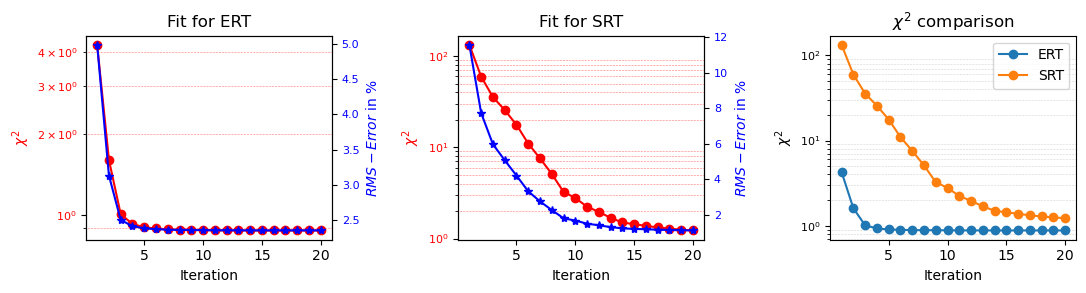

In [5]:
# Without weighting
a = [a_ert, a_srt]
lam = [lam_ert, lam_srt]
beta = beta
w1 = 1 # weight ert
w2 = 1 # weight srt

ERT3 = ert.ERTManager(ert_data)
SRT3 = TravelTimeManager(tt_data)
J1 = JEI(mgr_list=[ERT3,SRT3], data_list=[ert_data,tt_data], 
         mesh=invmesh, order=q, beta=beta,smooth_factor=a)

KWs = dict(lam=lam[1], verbose=False, vTop=500, vBottom=4500, secNodes=2)
KWe = dict(lam=lam[0], verbose=False)
J1.setMethodMesh(extmesh, 0)
J1.setKWInv([KWe, KWs])
J1.setNames(['ERT','SRT'])
J1.setMethodWeights([w1,w2])

J1.runInversion('ME', maxIter=20, breakup_criterion='all', chi_limit=1)
SRT3.inv.model = 1/SRT3.inv.model

[r_est_jme, v_est_jme] = J1.getModels()
    
J1.plotFitHistory()

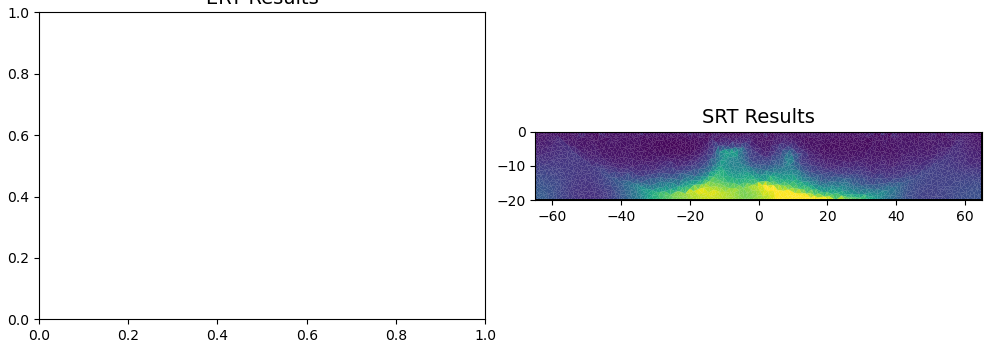

In [6]:
%matplotlib widget
fig, ax, [cax1, cax2] = plotJointResultsComparison(invmesh, [r_est_jme],  [v_est_jme], 
                                                   c_ert, c_srt, lim_ert, lim_srt, ['no Sens'], labels=True,
                                                   ert_marks=ert_marks, srt_marks=srt_marks, 
                                                   ert_label=ert_label, srt_label=srt_label, marks=True)

## new seismic startmodel

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1afb835fc70>)

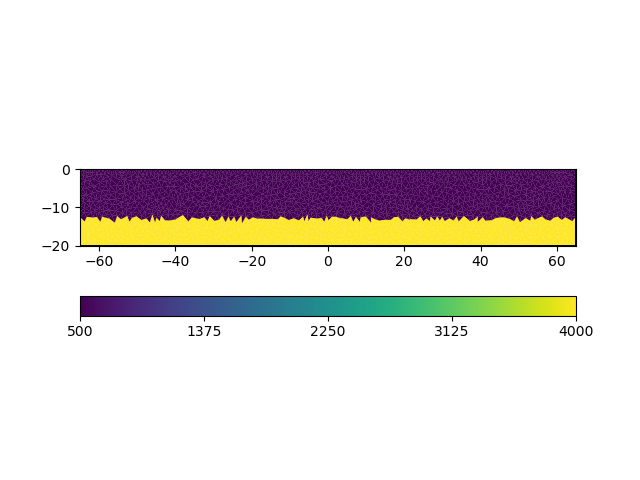

In [7]:
new_start = pg.y(invmesh.cellCenters())

for i,z in enumerate(new_start):
    if z<=-13:
        new_start[i] = 1/4000
    else:
        new_start[i] = 1/500
        
pg.show(invmesh, 1/new_start)

In [8]:
v_est_con = SRT.invert(tt_data, mesh=invmesh, startModel=new_start, lam=6, secNodes=1, verbose=True, maxIter=30)

01/08/23 - 15:30:52 - pyGIMLi - INFO - Found 1 regions.
01/08/23 - 15:30:52 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/08/23 - 15:30:52 - pyGIMLi - INFO - Creating refined mesh (secnodes: 1) to solve forward task.
01/08/23 - 15:30:53 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x000001AFFB9A89A0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001AFFBD7B0E0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001AFFBD7B040>
min/max (data): 0.0018/0.08
min/max (error): 0.96%/1.09%
min/max (start model): 2.5e-04/0.002
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 40.09 (dPhi = 85.94%) lam: 6
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 24.94 (dPhi = 37.74%) lam: 6.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 21.75 (dPhi = 12.78%) lam: 6.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 18.63 (dPhi = 14.3%) lam: 6.0
-----------------------------------

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1afb67897f0>)

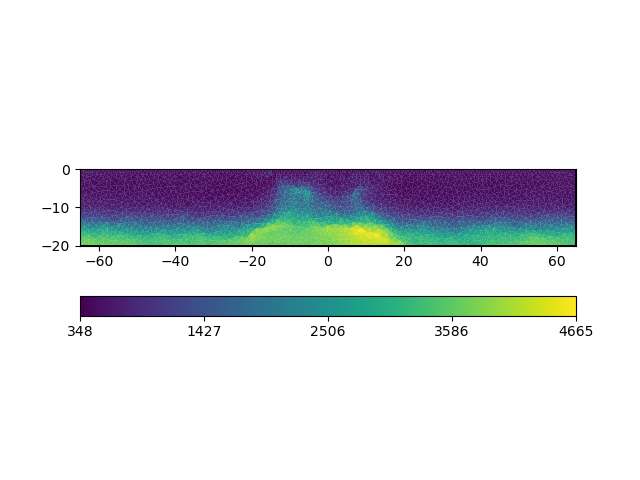

In [9]:
pg.show(invmesh, v_est_con)

## JME - new

01/08/23 - 16:15:29 - pyGIMLi - INFO - Found 2 regions.
01/08/23 - 16:15:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (0) set to background.
01/08/23 - 16:15:29 - pyGIMLi - INFO - Creating forward mesh from region infos.


Starting Iteration 0...
... ERT


01/08/23 - 16:15:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/08/23 - 16:15:30 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 7632 Cells: 14948 Boundaries: 11368
01/08/23 - 16:15:30 - pyGIMLi - INFO - Use median(data values)=619.288890298902
01/08/23 - 16:15:30 - pyGIMLi - INFO - Created startmodel from forward operator: 2979 [619.288890298902,...,619.288890298902]
01/08/23 - 16:15:30 - pyGIMLi - INFO - Setting starting model as reference!
01/08/23 - 16:16:11 - pyGIMLi - INFO - Found 1 regions.
01/08/23 - 16:16:11 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/08/23 - 16:16:11 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.


... SRT


01/08/23 - 16:16:11 - pyGIMLi - INFO - Setting starting model as reference!
01/08/23 - 16:16:28 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
01/08/23 - 16:16:28 - pyGIMLi - INFO - Created startmodel from forward operator: [0.0019436  0.00100529 0.0019436  ... 0.00020856 0.00020207 0.0002198 ]


Starting iteration 1...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=90
#####     ERT weighted misfit chi^2   = 5.11
#####     SRT weighted misfit chi^2   = 31.63
#####     stabilizing functional    S = 203.36
#####     joint weighted misfit chi^2 = 36.73
############################################################
       
Starting iteration 2...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=90
#####     ERT weighted misfit chi^2   = 1.53
#####     SRT weighted misfit chi^2   = 20.00
#####     stabilizing functional    S = 1400.56
#####     joint weighted misfit chi^2 = 21.53
############################################################
       
Starting iteration 3...
Set JME weights for ERT with q=1, b=1e-10 and a=15
Set JME weights for SRT with q=1, b=1e-10 and a=90
#####     ERT weighted misfit chi^2   = 1.00
#####     SRT weighted misfit chi^2   = 18.29
#####     stabilizing fu

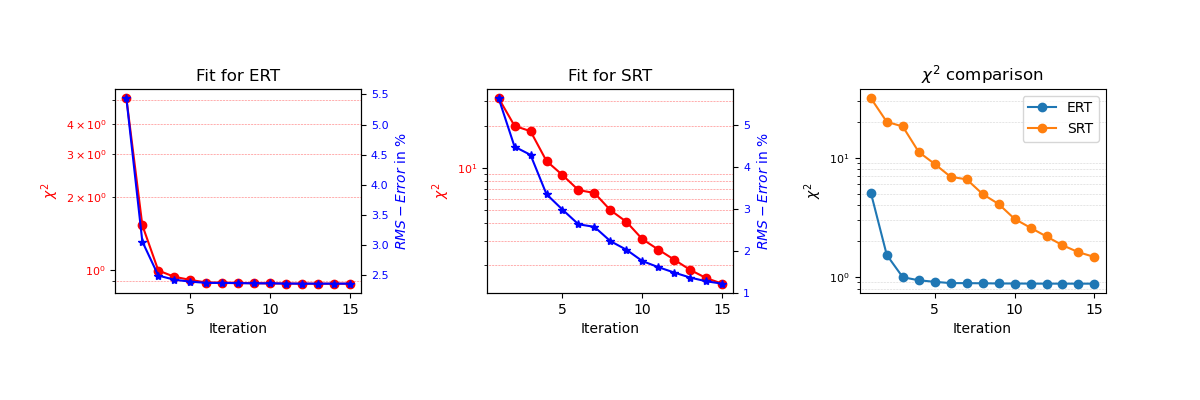

In [11]:
# Without weighting
a = [a_ert, a_srt]
lam = [lam_ert, lam_srt]
beta = beta
w1 = 1 # weight ert
w2 = 1 # weight srt

ERT3 = ert.ERTManager(ert_data)
SRT3 = TravelTimeManager(tt_data)
J1 = JEI(mgr_list=[ERT3,SRT3], data_list=[ert_data,tt_data], 
         mesh=invmesh, order=q, beta=beta,smooth_factor=a)

KWs = dict(lam=lam[1], verbose=False, startModel=new_start, secNodes=2)
KWe = dict(lam=lam[0], verbose=False)
J1.setMethodMesh(extmesh, 0)
J1.setKWInv([KWe, KWs])
J1.setNames(['ERT','SRT'])
J1.setMethodWeights([w1,w2])

J1.runInversion('ME', maxIter=20, breakup_criterion='all', chi_limit=1.5)
SRT3.inv.model = 1/SRT3.inv.model

[r_est_jme_new, v_est_jme_new] = J1.getModels()
    
J1.plotFitHistory()

## Show Both results

In [ ]:
%matplotlib inline
r_start = ERT3.inv.startModel

fig, ax, [cax1, cax2] = plotJointResultsComparison(invmesh, [r_est_jme, r_start, r_est_jme_new], [v_est_jme, 1/new_start, v_est_jme_new],
                               c_ert, c_srt, lim_ert, lim_srt, label_list=['JME - old start', 'New start', 'JME - new start'], labels=True,
                               ert_marks=ert_marks, srt_marks=srt_marks, 
                               ert_label=ert_label, srt_label=srt_label, marks=True,
                               figsize=(10,5))

ax[0,0].set_title('ERT', fontsize=16)
ax[0,1].set_title('SRT', fontsize=16)

# fig.suptitle(f'    Conventional smoothness-constrained inversion',fontsize=16, y=1.15)

# plt.savefig(f'C:/Users/azieg/Desktop/GIT_repositories/APG-MSc-Project-Ziegon/Figures/Ch-6/JME_with_new_start.pdf', 
#             bbox_inches='tight',
#             dpi=600)